# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,✅ Trip Verified | London Heathrow to Gibralta...
2,✅ Trip Verified | First time flying British Ai...
3,Not Verified | I flew London to Cairo and ret...
4,Not Verified | Absolutely the worst experienc...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,✅ Trip Verified | London Heathrow to Gibralta...
2,✅ Trip Verified | First time flying British Ai...
3,Not Verified | I flew London to Cairo and ret...
4,Not Verified | Absolutely the worst experienc...
...,...
995,✅ Trip Verified | Boston to London. World Tra...
996,✅ Trip Verified | London to Athens. We were f...
997,✅ Trip Verified | London to Johannesburg. So ...
998,✅ Trip Verified | Newark to Bangalore return ...


Remove "Trip Verified" and "Not Verified" from the review

In [6]:
df = df.reviews.str.split("|", expand=True)[1]

In [7]:
df

0         1. Ground crew in Heathrow left 60 passenge...
1        London Heathrow to Gibraltar on 24th October...
2       First time flying British Airways and I would...
3        I flew London to Cairo and return in October...
4        Absolutely the worst experience ever.  Flew ...
                             ...                        
995      Boston to London. World Traveler seats. Nice...
996      London to Athens. We were fortunate to get e...
997      London to Johannesburg. So impressed by the ...
998      Newark to Bangalore return via London on BA ...
999      London to Berlin scheduled for 21st December...
Name: 1, Length: 1000, dtype: object

Preprocessing the data:
1. Cleaning the raw data
2. Tokenizing the data
3. Removing stopwords
4. Lemmatizing the data

In [14]:
# saving original data
original_df = pd.DataFrame(df)

Step 1: Cleaing the raw data

In [17]:
df = pd.DataFrame(df)
df.columns = ['reviews']
df.head()

,reviews
0,1. Ground crew in Heathrow left 60 passenge...
1,London Heathrow to Gibraltar on 24th October...
2,First time flying British Airways and I would...
3,I flew London to Cairo and return in October...
4,Absolutely the worst experience ever. Flew ...


Merging multiple points of review into single review

For e.g. if someone writes
"1. I took the flight on some date. 2. I am having some problem with luggage. 3. Staff was not supporting."

Converting it to single sentance:
" I took the flight on some date. I am having some problem with luggage. Staff was not supporting."

In [26]:
import re

def merge_review(text):
    text = re.sub('[0-9][.]', "",text)
    return text

df['cleaned_data'] = df['reviews'].apply(lambda x: merge_review(x))
df.head()

,reviews,cleaned_data
0,1. Ground crew in Heathrow left 60 passenge...,Ground crew in Heathrow left 60 passengers...
1,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on 24th October...
2,First time flying British Airways and I would...,First time flying British Airways and I would...
3,I flew London to Cairo and return in October...,I flew London to Cairo and return in October...
4,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever. Flew ...


Removing special characters(if any) from the reviews

In [27]:
import string

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    return text

df['cleaned_data'] = df['cleaned_data'].apply(lambda x: clean_text(x))

df.head()

,reviews,cleaned_data
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...
2,First time flying British Airways and I would...,first time flying british airways and i would...
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...


Step 2: Tokenizing the cleaned data

In [36]:
import re

def tokenize(text):
    return re.split("\W+", text)

df['tokenized_data'] = df['cleaned_data'].apply(lambda x: tokenize(x.lower().lstrip(" ")))

df.head()

,reviews,cleaned_data,tokenized_data
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...,"[ground, crew, in, heathrow, left, 60, passeng..."
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...,"[london, heathrow, to, gibraltar, on, 24th, oc..."
2,First time flying British Airways and I would...,first time flying british airways and i would...,"[first, time, flying, british, airways, and, i..."
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...,"[i, flew, london, to, cairo, and, return, in, ..."
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...,"[absolutely, the, worst, experience, ever, fle..."


Step 3: Removing stopwords

In [80]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

df['data_without_stopwords'] = df['tokenized_data'].apply(lambda x: remove_stopwords(x))
# df['data_without_stopwords'] = df['cleaned_data'].apply(lambda x: remove_stopwords(x))

df.head()

,reviews,cleaned_data,tokenized_data,data_without_stopwords,lemmatized_data,Sentiment,Analysis
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...,"[ground, crew, in, heathrow, left, 60, passeng...","[ground, crew, heathrow, left, 60, passengers,...","[ground, crew, heathrow, left, 60, passenger, ...",0.0,Neutral
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...,"[london, heathrow, to, gibraltar, on, 24th, oc...","[london, heathrow, gibraltar, 24th, october, 2...","[london, heathrow, gibraltar, 24th, october, 2...",0.0,Neutral
2,First time flying British Airways and I would...,first time flying british airways and i would...,"[first, time, flying, british, airways, and, i...","[first, time, flying, british, airways, would,...","[first, time, flying, british, airway, would, ...",0.0,Neutral
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...,"[i, flew, london, to, cairo, and, return, in, ...","[flew, london, cairo, return, october, 202, ba...","[flew, london, cairo, return, october, 202, ba...",0.0,Neutral
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...,"[absolutely, the, worst, experience, ever, fle...","[absolutely, worst, experience, ever, flew, he...","[absolutely, worst, experience, ever, flew, he...",0.0,Neutral


Step 4: Lemmatizing the data

In [63]:
import nltk
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    return [wn.lemmatize(word) for word in text]

df['lemmatized_data'] = df['data_without_stopwords'].apply(lambda x: lemmatize(x))
df.head()

,reviews,cleaned_data,tokenized_data,data_without_stopwords,lemmatized_data
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...,"[ground, crew, in, heathrow, left, 60, passeng...","[ground, crew, heathrow, left, 60, passengers,...","[ground, crew, heathrow, left, 60, passenger, ..."
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...,"[london, heathrow, to, gibraltar, on, 24th, oc...","[london, heathrow, gibraltar, 24th, october, 2...","[london, heathrow, gibraltar, 24th, october, 2..."
2,First time flying British Airways and I would...,first time flying british airways and i would...,"[first, time, flying, british, airways, and, i...","[first, time, flying, british, airways, would,...","[first, time, flying, british, airway, would, ..."
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...,"[i, flew, london, to, cairo, and, return, in, ...","[flew, london, cairo, return, october, 202, ba...","[flew, london, cairo, return, october, 202, ba..."
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...,"[absolutely, the, worst, experience, ever, fle...","[absolutely, worst, experience, ever, flew, he...","[absolutely, worst, experience, ever, flew, he..."


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reviews                 1000 non-null   object
 1   cleaned_data            1000 non-null   object
 2   tokenized_data          1000 non-null   object
 3   data_without_stopwords  1000 non-null   object
 4   lemmatized_data         1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


Vader Sentiment analysis

In [65]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
# joining the lemmatized data because we need to pass sentence to the analyzer to get the sentiment of the review

def join_data(text):
    return ' '.join(text)

df['joined_text'] = df['lemmatized_data'].apply(lambda x: join_data(x))
df.head()

,reviews,cleaned_data,tokenized_data,data_without_stopwords,lemmatized_data,joined_text
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...,"[ground, crew, in, heathrow, left, 60, passeng...","[ground, crew, heathrow, left, 60, passengers,...","[ground, crew, heathrow, left, 60, passenger, ...",ground crew heathrow left 60 passenger luggage...
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...,"[london, heathrow, to, gibraltar, on, 24th, oc...","[london, heathrow, gibraltar, 24th, october, 2...","[london, heathrow, gibraltar, 24th, october, 2...",london heathrow gibraltar 24th october 202 sha...
2,First time flying British Airways and I would...,first time flying british airways and i would...,"[first, time, flying, british, airways, and, i...","[first, time, flying, british, airways, would,...","[first, time, flying, british, airway, would, ...",first time flying british airway would hesitat...
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...,"[i, flew, london, to, cairo, and, return, in, ...","[flew, london, cairo, return, october, 202, ba...","[flew, london, cairo, return, october, 202, ba...",flew london cairo return october 202 basically...
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...,"[absolutely, the, worst, experience, ever, fle...","[absolutely, worst, experience, ever, flew, he...","[absolutely, worst, experience, ever, flew, he...",absolutely worst experience ever flew heathrow...


In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# print(dir(analyzer))
def vaderSentimentAnalysis(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

df['Sentiment'] = df['joined_text'].apply(vaderSentimentAnalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,cleaned_data,tokenized_data,data_without_stopwords,lemmatized_data,joined_text,Sentiment,Analysis
0,1. Ground crew in Heathrow left 60 passenge...,ground crew in heathrow left 60 passengers...,"[ground, crew, in, heathrow, left, 60, passeng...","[ground, crew, heathrow, left, 60, passengers,...","[ground, crew, heathrow, left, 60, passenger, ...",ground crew heathrow left 60 passenger luggage...,0.3378,Neutral
1,London Heathrow to Gibraltar on 24th October...,london heathrow to gibraltar on 24th october...,"[london, heathrow, to, gibraltar, on, 24th, oc...","[london, heathrow, gibraltar, 24th, october, 2...","[london, heathrow, gibraltar, 24th, october, 2...",london heathrow gibraltar 24th october 202 sha...,0.8074,Positive
2,First time flying British Airways and I would...,first time flying british airways and i would...,"[first, time, flying, british, airways, and, i...","[first, time, flying, british, airways, would,...","[first, time, flying, british, airway, would, ...",first time flying british airway would hesitat...,0.9382,Positive
3,I flew London to Cairo and return in October...,i flew london to cairo and return in october...,"[i, flew, london, to, cairo, and, return, in, ...","[flew, london, cairo, return, october, 202, ba...","[flew, london, cairo, return, october, 202, ba...",flew london cairo return october 202 basically...,0.9729,Positive
4,Absolutely the worst experience ever. Flew ...,absolutely the worst experience ever flew i...,"[absolutely, the, worst, experience, ever, fle...","[absolutely, worst, experience, ever, flew, he...","[absolutely, worst, experience, ever, flew, he...",absolutely worst experience ever flew heathrow...,-0.9876,Negative


In [111]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    465
Negative    433
Neutral     102
Name: count, dtype: int64

Visual Representation

([<matplotlib.patches.Wedge at 0x1cc7a4bd310>,
 [Text(0.12070772991605276, 1.0933570523568745, 'Positive'),
  Text(-0.458955967806137, -0.9996796584982273, 'Negative'),
  Text(1.044005761565502, -0.34648516536503604, 'Neutral')],
 [Text(0.06584057995421058, 0.5963765740128406, '46.5%'),
  Text(-0.25033961880334743, -0.5452798137263057, '43.3%'),
  Text(0.5694576881266374, -0.18899190838092872, '10.2%')])

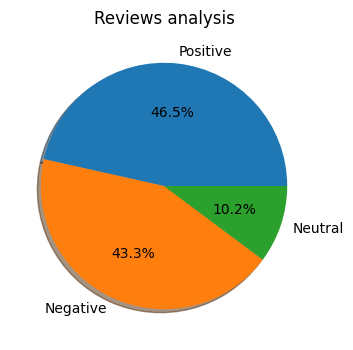

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

plt.title('Reviews analysis')
plt.pie(vader_counts.values, labels=vader_counts.index, shadow=True, autopct="%0.1f%%")

In [110]:
df.to_csv("data/BA_reviews.csv")

Wordcloud

In [112]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 4.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


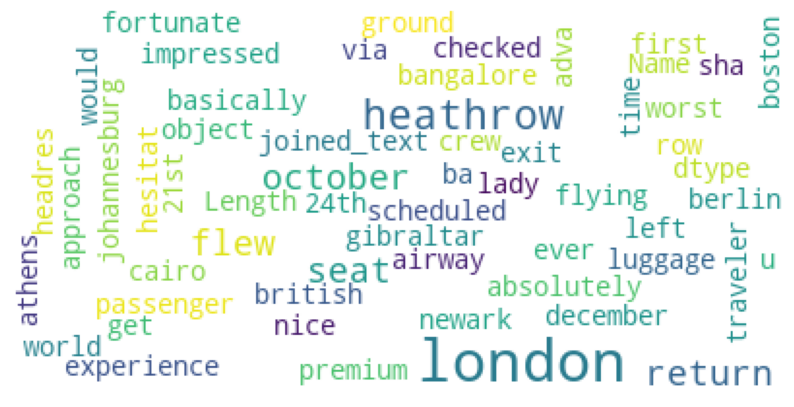

In [115]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(stopwords)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30
    ).generate(str(data))

    plt.figure(1, figsize=(10,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['joined_text'])